In [52]:
# Find an optimal number of clusters for k-means over the marketing dataset
# Use the optimal cluster number in K-means to cluster the marketing data.
# Visualize the relations between income and spending for all resulting 
# clusters using a scatter plot.
# Visualize the relations between income and age for all resulting clusters 
# using another scatter plot.
# Try to find meaningful names for different clusters based on these visualizations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

train_data = pd.read_csv('market_ds.csv')
train_data.head(5)

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


d:\pythonWorkplace\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\pythonWorkplace\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\pythonWorkplace\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\pythonWorkplace\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory le

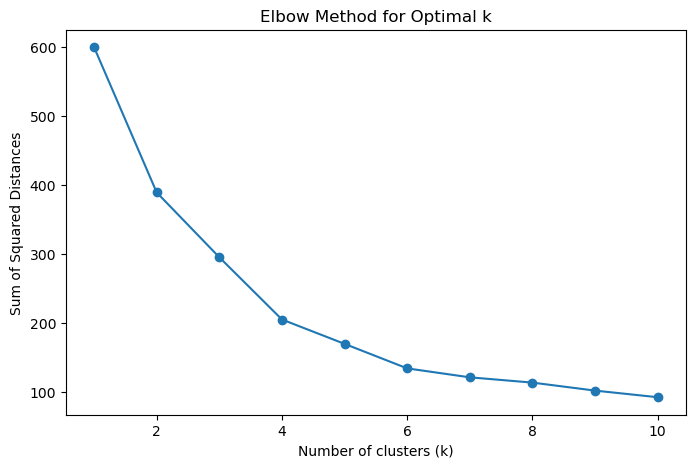

In [53]:
# Find an optimal number of clusters for k-means over the marketing dataset
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_data)

# we use two methods to find the optimal number of clusters: the elbow method and silhouette score
# Elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, random_state=42)
    kmeans_elbow.fit(X_scaled)
    sse.append(kmeans_elbow.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()


d:\pythonWorkplace\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\pythonWorkplace\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\pythonWorkplace\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\pythonWorkplace\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory le

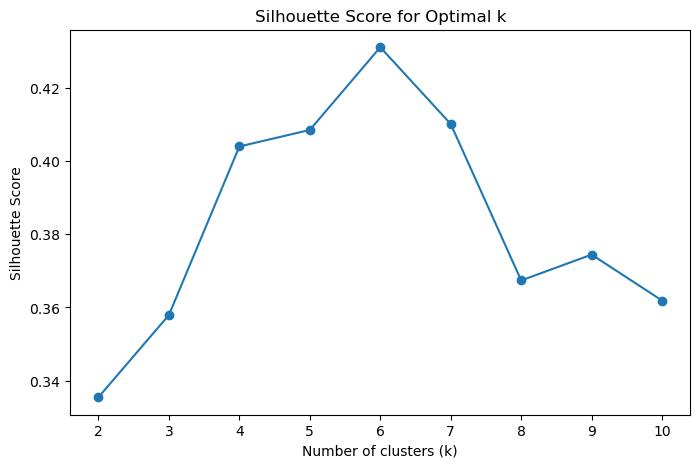

Best number of clusters: 6


In [54]:
# Silhouette score
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans_sh = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans_sh.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()
best_k = k_range[np.argmax(silhouette_scores)]
print(f'Best number of clusters: {best_k}')

d:\pythonWorkplace\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


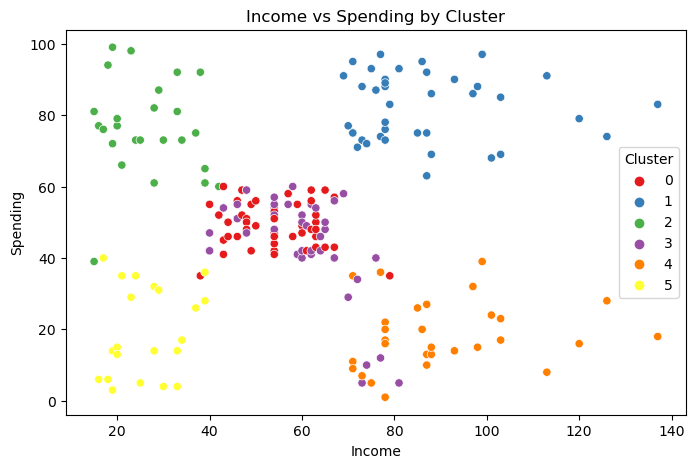

In [55]:
# Use the optimal cluster number in K-means to cluster the marketing data.
# Visualize the relations between income and spending for all resulting 
# clusters using a scatter plot.
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_scaled)
train_data['Cluster'] = kmeans.labels_
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_data, x='Income', y='Spending', hue='Cluster', palette='Set1')
plt.title('Income vs Spending by Cluster')
plt.show()

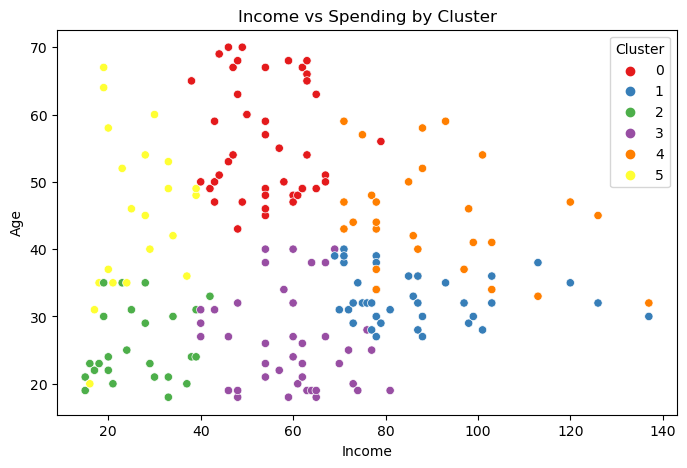

In [56]:
# Visualize the relations between income and age for all resulting clusters 
# using another scatter plot.
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_data, x='Income', y='Age', hue='Cluster', palette='Set1')
plt.title('Income vs Spending by Cluster')
plt.show()

d:\pythonWorkplace\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


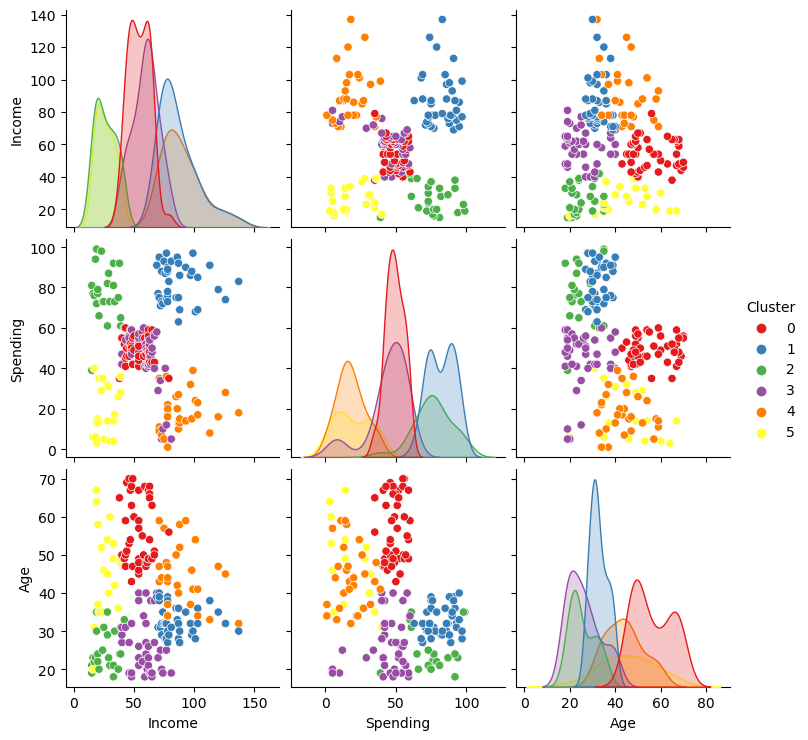

Cluster feature means:
         Income  Spending    Age
Cluster                         
0         54.27     49.07  56.33
1         86.54     82.13  32.69
2         26.48     76.24  25.56
3         59.42     44.45  26.12
4         90.13     17.93  44.00
5         26.29     19.38  45.52

Cluster 0:
  Average Income = 54.27, Average Spending = 49.07, Average Age = 56.33
Low-income Group

Cluster 1:
  Average Income = 86.54, Average Spending = 82.13, Average Age = 32.69
RIch Group

Cluster 2:
  Average Income = 26.48, Average Spending = 76.24, Average Age = 25.56
Moonlight Clan

Cluster 3:
  Average Income = 59.42, Average Spending = 44.45, Average Age = 26.12
Low-income Group

Cluster 4:
  Average Income = 90.13, Average Spending = 17.93, Average Age = 44.0
Frugal Group

Cluster 5:
  Average Income = 26.29, Average Spending = 19.38, Average Age = 45.52
Low-income Group


In [57]:
# Try to find meaningful names for different clusters based on these visualizations.
sns.pairplot(train_data, vars=['Income', 'Spending', 'Age'], hue='Cluster', palette='Set1')
plt.show()
cluster_summary = train_data.groupby('Cluster')[['Income', 'Spending', 'Age']].mean().round(2)
print("Cluster feature means:")
print(cluster_summary)
for cluster, row in cluster_summary.iterrows():
    print(f"\nCluster {cluster}:")
    print(f"  Average Income = {row['Income']}, Average Spending = {row['Spending']}, Average Age = {row['Age']}")
    if row['Income'] > train_data['Income'].mean() and row['Spending'] > train_data['Spending'].mean():
        print("RIch Group")
    elif row['Income'] < train_data['Income'].mean() and row['Spending'] > train_data['Spending'].mean():
        print("Moonlight Clan")
    elif row['Income'] > train_data['Income'].mean() and row['Spending'] < train_data['Spending'].mean():
        print("Frugal Group")
    else:
        print("Low-income Group")
